<a href="https://colab.research.google.com/github/codeguy234/4410Homework/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

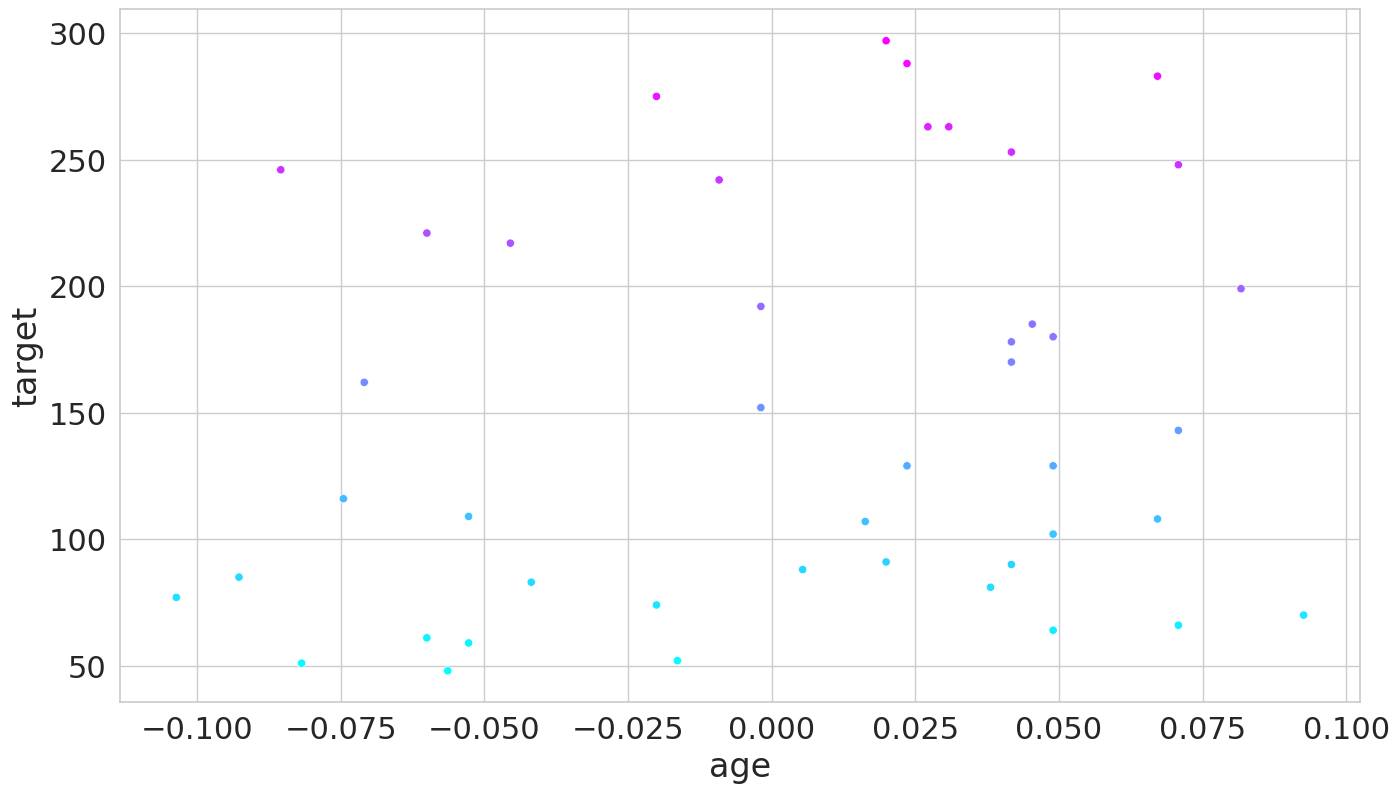

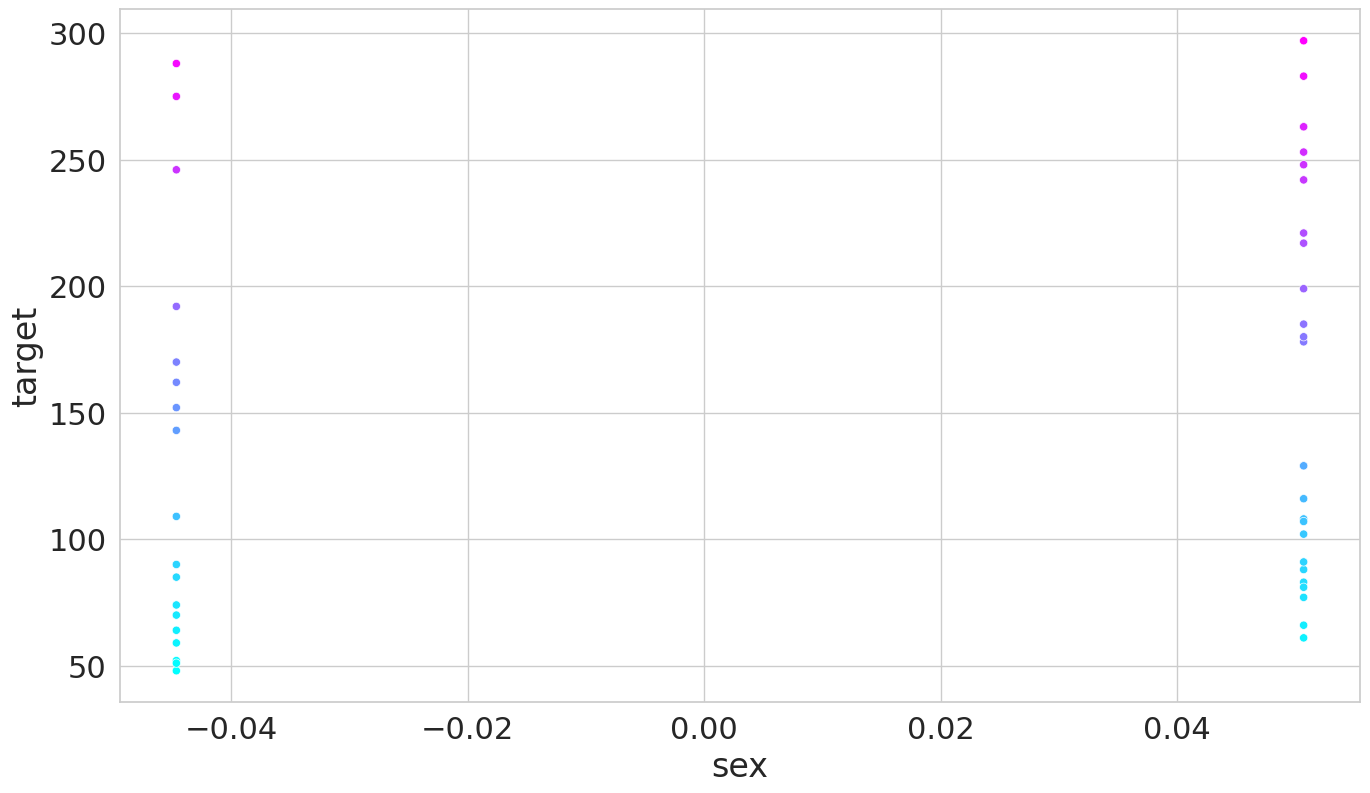

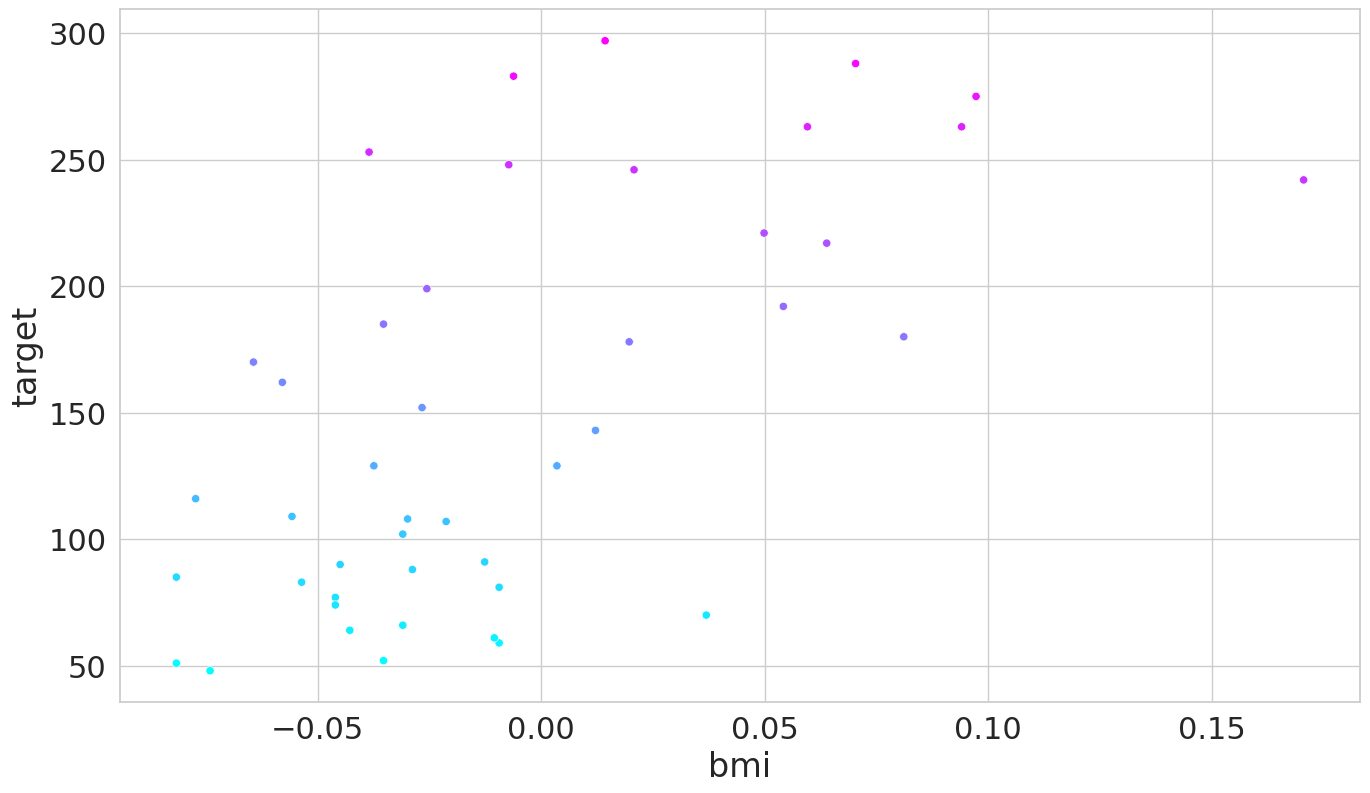

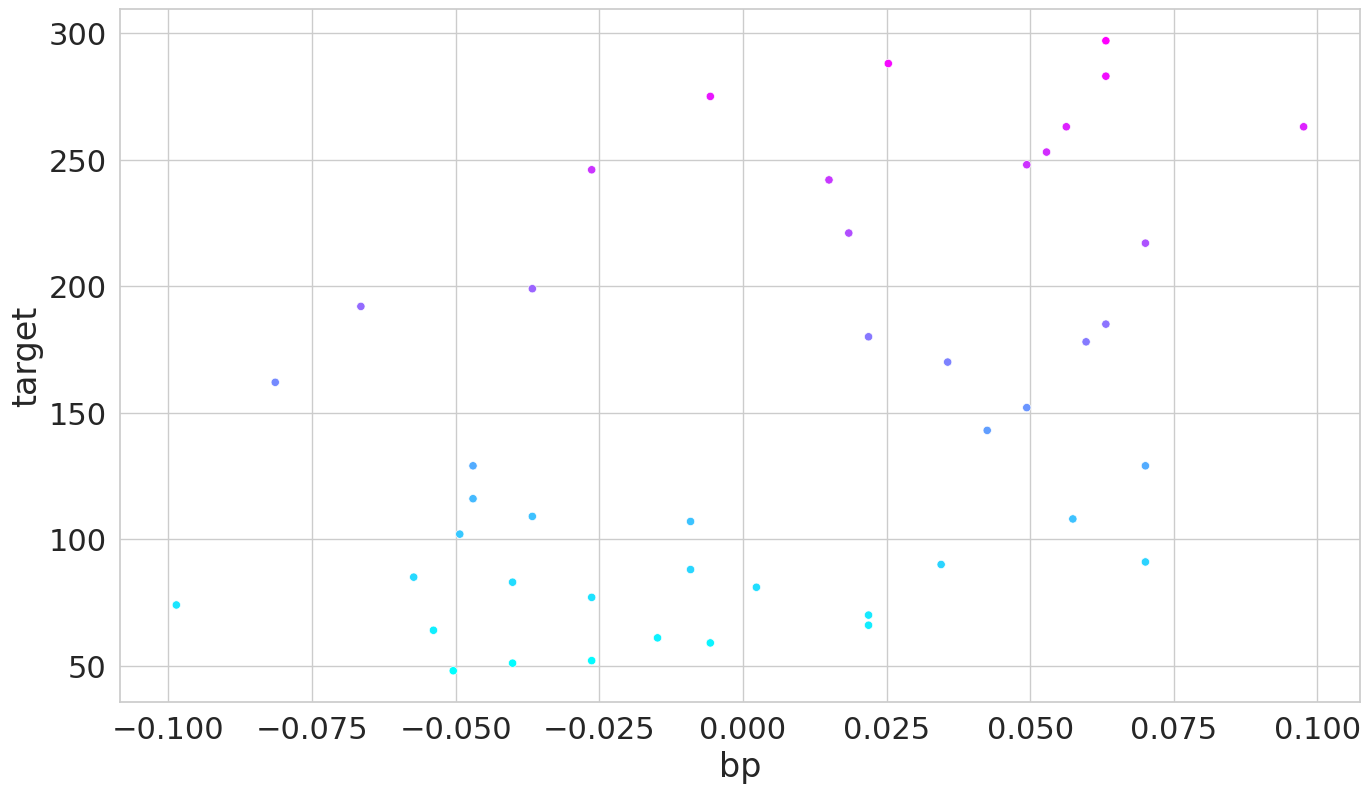

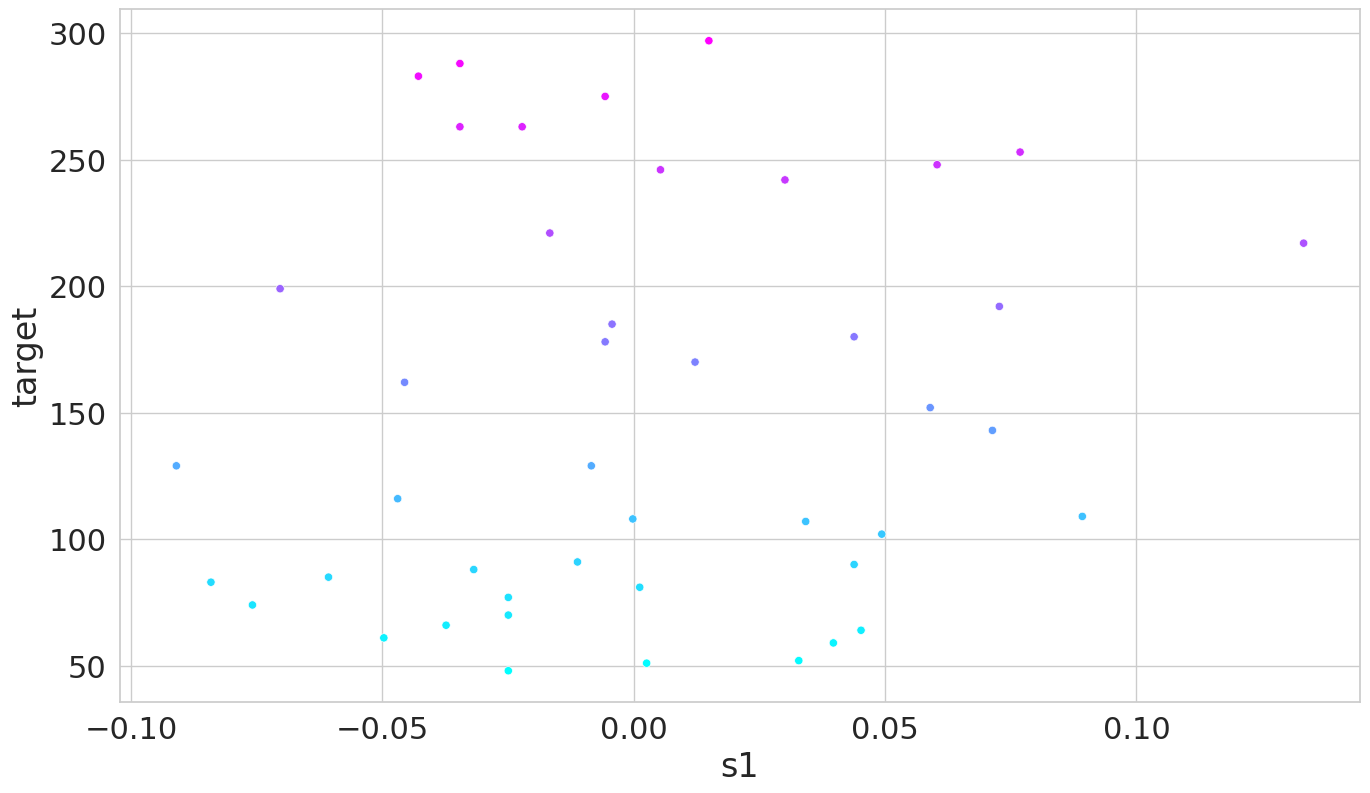

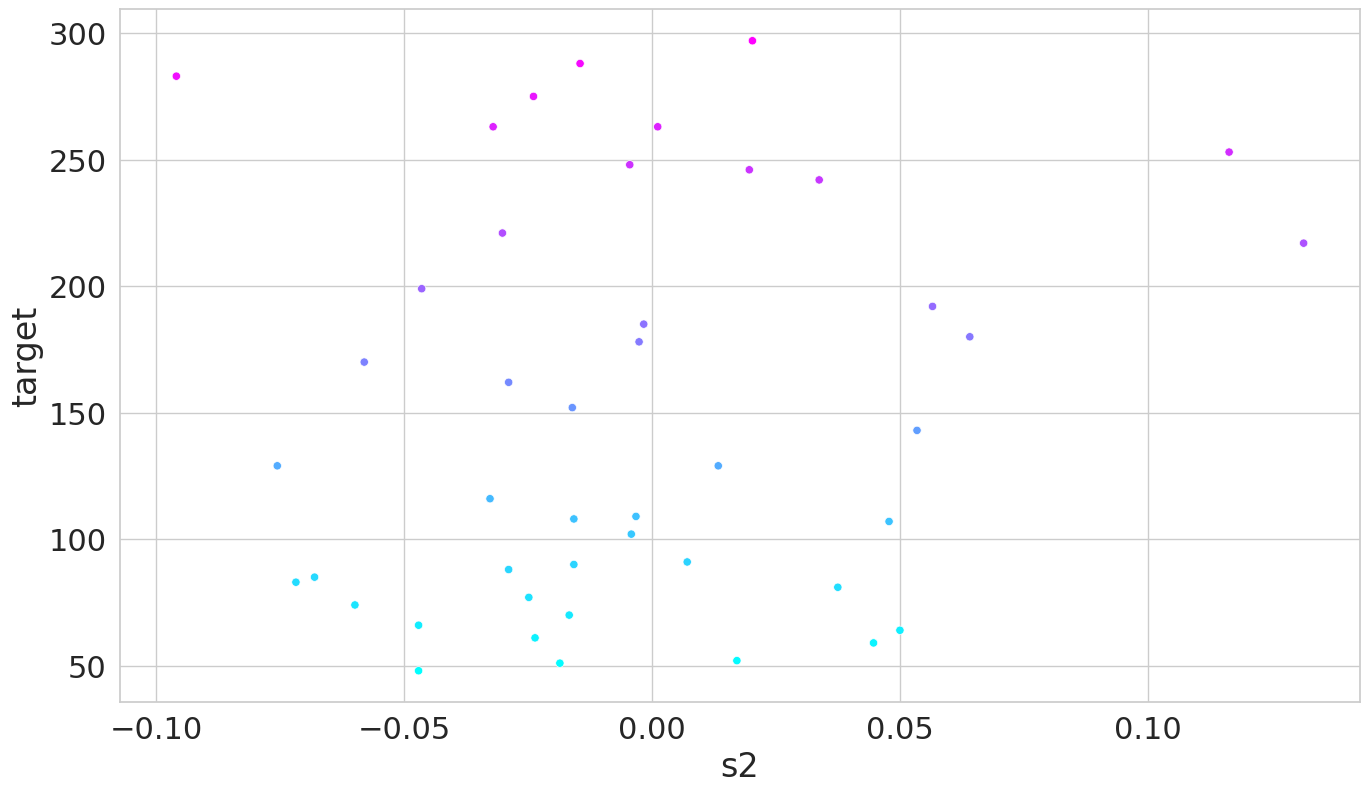

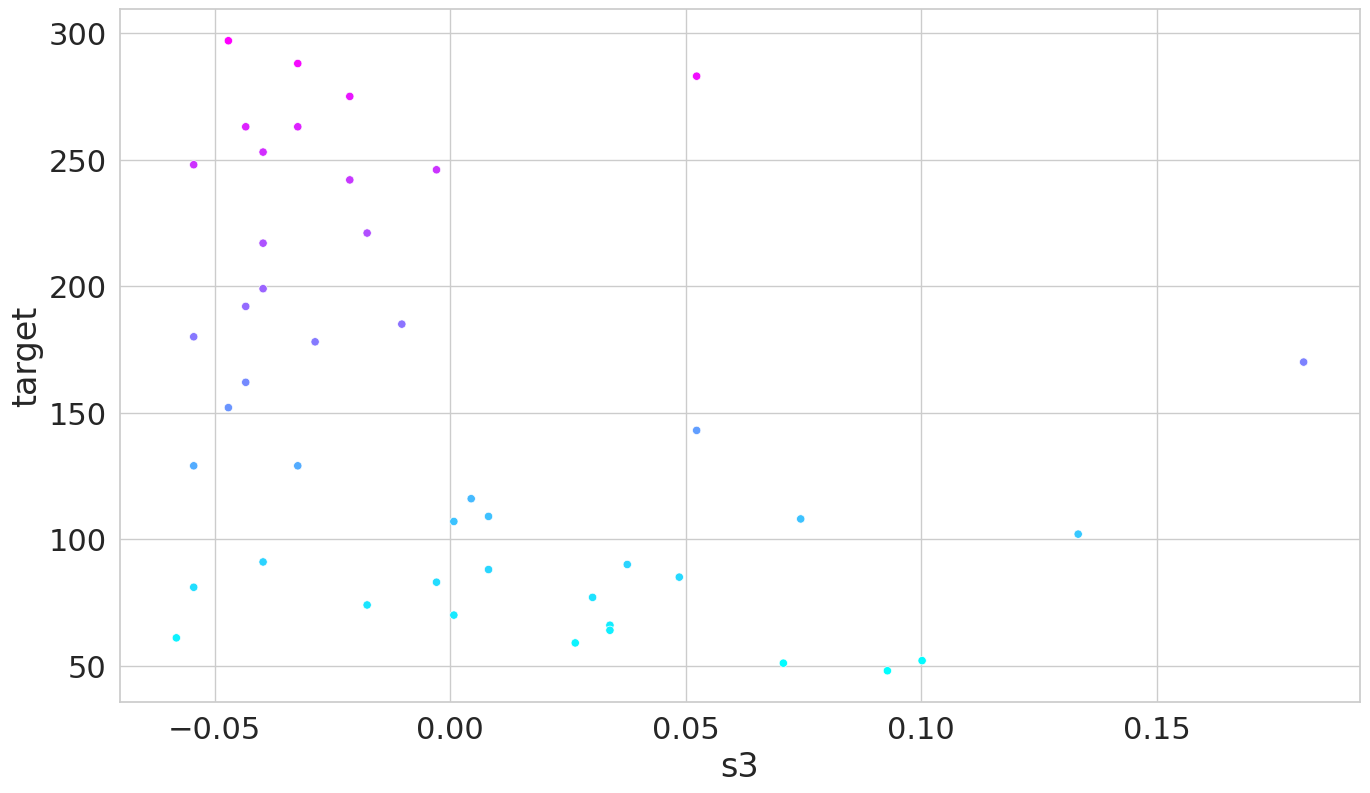

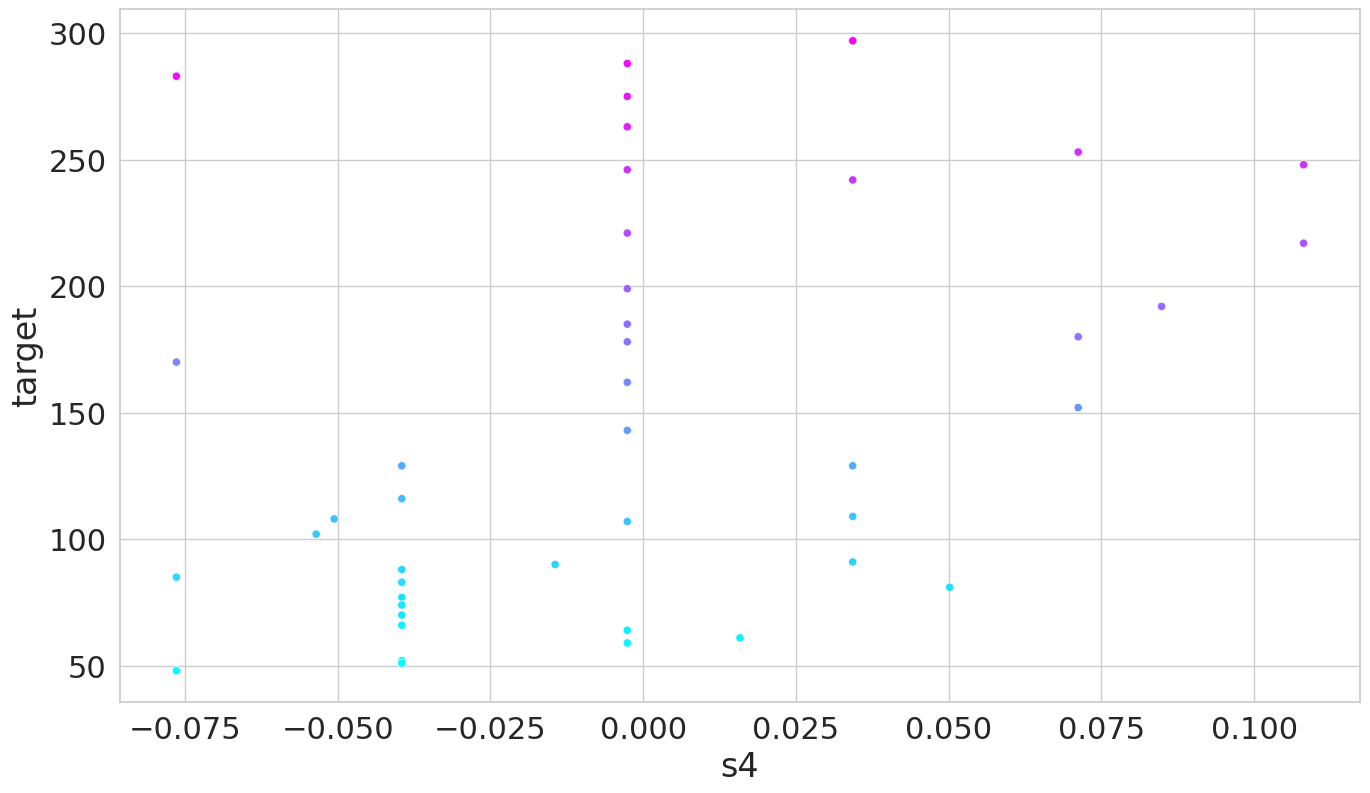

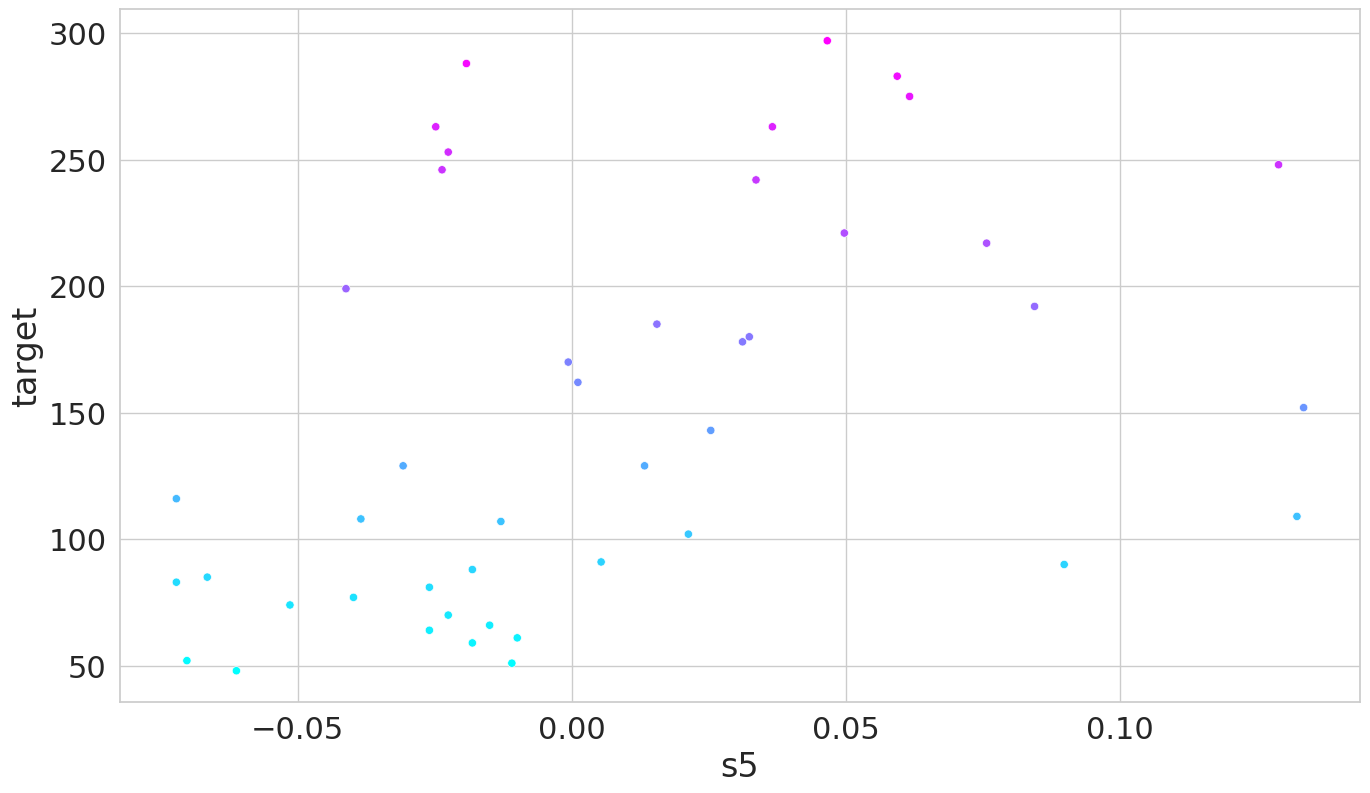

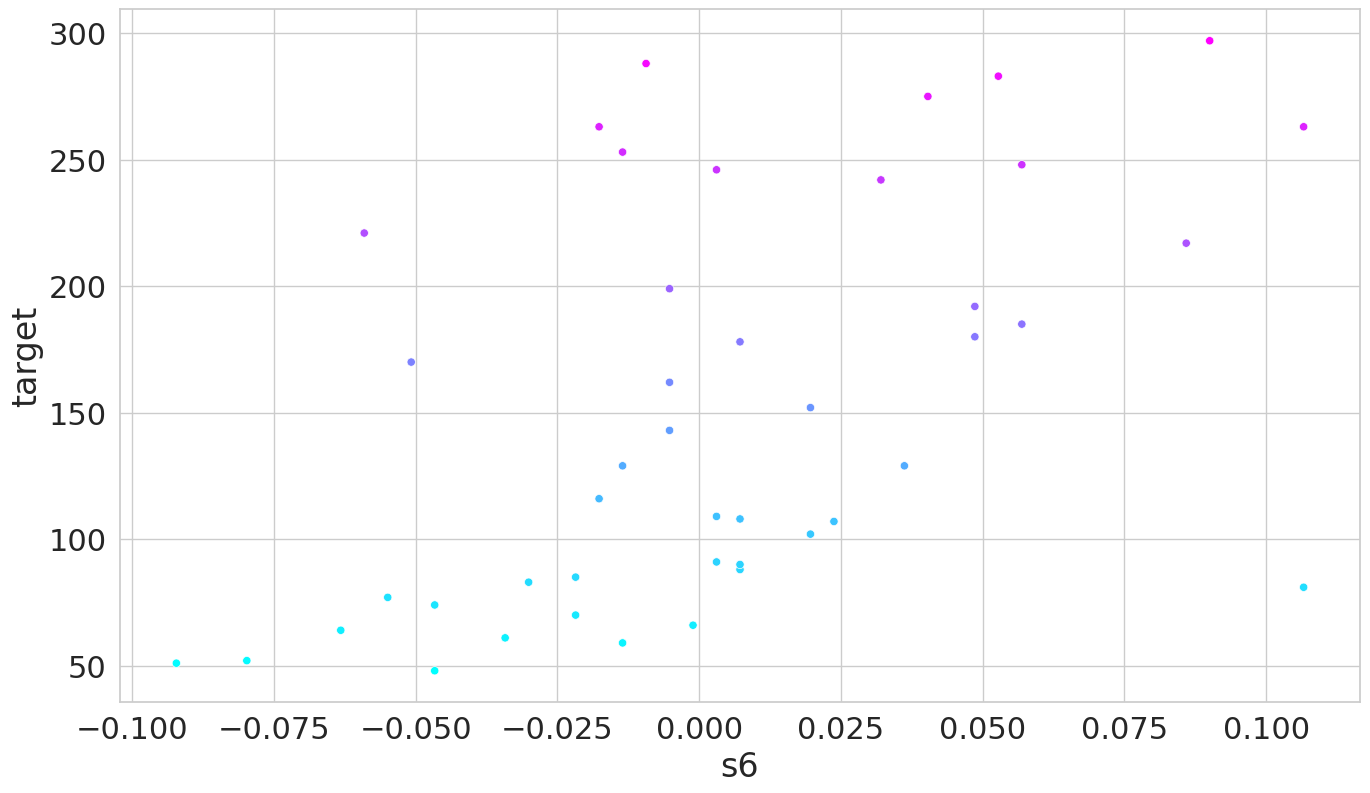

       age: -60.21981405677291
       sex: -266.45705232203574
       bmi: 523.0634112596993
        bp: 310.5134699670048
        s1: -336.1614738106944
        s2: 137.3392923842451
        s3: -131.13923283453653
        s4: -1.1492348017315557
        s5: 622.3286855688128
        s6: 60.466457691682535
LinearRegression: mean of r2 scores=0.475


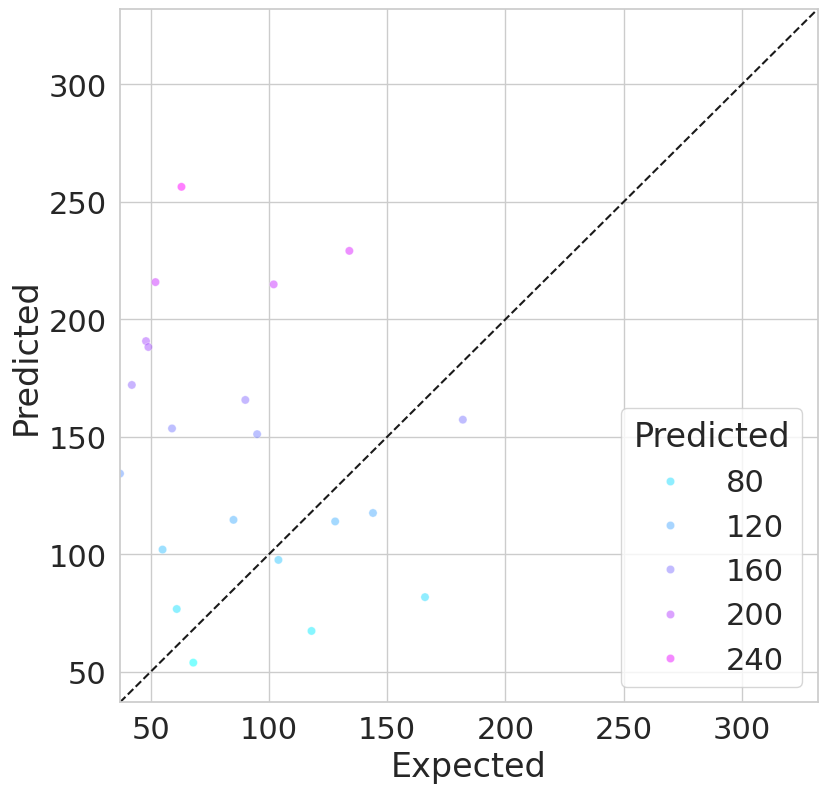

In [40]:
%matplotlib inline
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print(diabetes.DESCR)

diabetes.data.shape
diabetes.target.shape
diabetes.feature_names

import pandas as pd

#pd.set_option('precision', 4)
#pd.set_option('max_columns', 9)
#pd.set_option('display.width', None)
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = pd.Series(diabetes.target)
diabetes_df.head() # first 5 rows

diabetes_df.describe()

sample_df = diabetes_df.sample(frac=0.1, random_state=17)

import matplotlib.pyplot as plt
import seaborn as sns

#sns.set(font_scale=2)
sns.set_style('whitegrid')

for feature in diabetes.feature_names:
    plt.figure(figsize=(16, 9))
    sns.scatterplot(data=sample_df, x=feature, y='target', hue='target', palette='cool', legend=False)
    plt.show()


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    diabetes_df[diabetes.feature_names], diabetes_df['target'], random_state=11
)
X_train.shape
X_test.shape

from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)
for i, name in enumerate(diabetes.feature_names):
    print(f'{name:>10}: {linear_regression.coef_[i]}')

linear_regression.intercept_

predicted = linear_regression.predict(X_test)
expected = y_test
predicted[:5]  # first 5 predictions
expected[:5]   # first five targets

df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(9, 9))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted', hue='Predicted', palette='cool', alpha=0.5)

start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())
axes.set_xlim(start, end)
axes.set_ylim(start, end)
line = plt.plot([start, end], [start, end], 'k--')

from sklearn import metrics
metrics.r2_score(expected, predicted)

from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.model_selection import KFold, cross_val_score

estimators = {'LinearRegression': linear_regression}

from sklearn.model_selection import GridSearchCV
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
        X=diabetes.data, y=diabetes.target, cv=kfold,
        scoring='r2')
    print(f'{estimator_name:>16}: ' +
          f'mean of r2 scores={scores.mean():.3f}')